# Mini Project 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data [ x Marks] 

In [8]:
# scaling 
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(data)


## 4. Finding groups

### Approach 1

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

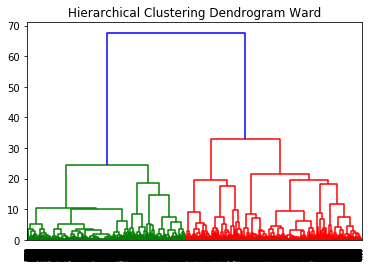

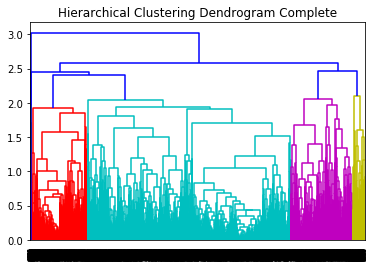

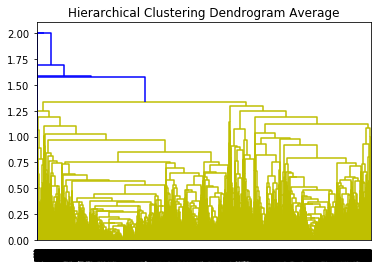

In [13]:
# dendrograms 

dend_ward = sch.dendrogram(sch.linkage(scaled_df,method = 'ward'))
plt.title('Hierarchical Clustering Dendrogram Ward')
plt.show()

dend_Comp = sch.dendrogram(sch.linkage(scaled_df,method = 'complete'))
plt.title('Hierarchical Clustering Dendrogram Complete')
plt.show()

dend_Acg = sch.dendrogram(sch.linkage(scaled_df,method = 'average'))
plt.title('Hierarchical Clustering Dendrogram Average')
plt.show()

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  



-------------

Answers - 
1. Suitable K is 2 from Ward linkage method as there is a huge jump in dissimilarity above that.
2. Complete linkage suggests 5 clusters with the first one being almost a singelton.
3. Average linkage is showing trends of chaining.

In [99]:
# clustering (hint: Use AgglomerativeClustering imported above)
columns =  ['n_clusters','linkage','affinity','silhoutte_score','centroid']
agglo = pd.DataFrame(data, columns=columns)
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()



clustering_ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward',affinity ='euclidean' ).fit(scaled_df)
agglo.loc[-1] = [2, 'ward', 'euclidean',metrics.silhouette_score(scaled_df, clustering_ward.labels_),clf.fit(scaled_df, clustering_ward.labels_).centroids_] 
agglo.index = agglo.index + 1 

clustering_comp_euc = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='euclidean').fit(scaled_df)
agglo.loc[-1] = [5, 'complete', 'euclidean',metrics.silhouette_score(scaled_df, clustering_comp_euc.labels_),clf.fit(scaled_df, clustering_comp_euc.labels_).centroids_]  
agglo.index = agglo.index + 1 

clustering_avg_euc = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='euclidean').fit(scaled_df)
agglo.loc[-1] = [2, 'average', 'euclidean',metrics.silhouette_score(scaled_df, clustering_avg_euc.labels_),clf.fit(scaled_df, clustering_avg_euc.labels_).centroids_]  
agglo.index = agglo.index + 1 

clustering_comp_man = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='manhattan').fit(scaled_df)
agglo.loc[-1] = [5, 'complete', 'manhattan',metrics.silhouette_score(scaled_df, clustering_comp_man.labels_),clf.fit(scaled_df, clustering_comp_man.labels_).centroids_] 
agglo.index = agglo.index + 1 

clustering_avg_man = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='manhattan').fit(scaled_df)
agglo.loc[-1] = [2, 'average', 'manhattan',metrics.silhouette_score(scaled_df, clustering_avg_man.labels_),clf.fit(scaled_df, clustering_avg_man.labels_).centroids_] 
agglo.index = agglo.index + 1 

clustering_comp_cos = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='cosine').fit(scaled_df)
agglo.loc[-1] = [5, 'complete', 'cosine',metrics.silhouette_score(scaled_df, clustering_comp_cos.labels_),clf.fit(scaled_df, clustering_comp_cos.labels_).centroids_]  
agglo.index = agglo.index + 1 

clustering_avg_cos = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='cosine').fit(scaled_df)
agglo.loc[-1] = [2, 'average', 'cosine',metrics.silhouette_score(scaled_df, clustering_avg_cos.labels_),clf.fit(scaled_df, clustering_avg_cos.labels_).centroids_]  
agglo.index = agglo.index + 1 

agglo = agglo.sort_index() 
print(agglo.head(7))


   n_clusters   linkage   affinity  silhoutte_score  \
0         2.0   average     cosine         0.273264   
1         5.0  complete     cosine         0.198418   
2         2.0   average  manhattan         0.495558   
3         5.0  complete  manhattan         0.253667   
4         2.0   average  euclidean         0.457327   
5         5.0  complete  euclidean         0.221464   
6         2.0      ward  euclidean         0.356759   

                                            centroid  
0  [[0.08225736356225932, 0.8777159739315354, 0.0...  
1  [[0.08603356396829212, 0.8343192733982882, 0.0...  
2  [[0.08202574317151691, 0.8772432939204362, 0.0...  
3  [[0.38561285459104405, 0.9978549550561797, 0.2...  
4  [[0.08196130145164246, 0.8771787061849976, 0.0...  
5  [[0.09295258353857112, 0.8600785079844635, 0.0...  
6  [[0.07097630304425732, 0.926940428815367, 0.03...  


### Approach 2
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [44]:
# clustering 
from sklearn import metrics
columns =  ['eps','min_pts','metric','n_clusters','core_points','noise_clusters','noise_points','silhoutte_score']
dbscan = pd.DataFrame(data, columns=columns)

label = DBSCAN(eps=0.1, min_samples=5,metric = 'euclidean').fit(scaled_df).labels_
dbscan.loc[-1] = [0.1,5,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.1, min_samples=5,metric = 'manhattan').fit(scaled_df).labels_
dbscan.loc[-1] = [0.1,5,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.1, min_samples=5,metric = 'cosine').fit(scaled_df).labels_
dbscan.loc[-1] = [0.1,5,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'euclidean').fit(scaled_df).labels_
dbscan.loc[-1] = [0.5,3,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'manhattan').fit(scaled_df).labels_
dbscan.loc[-1] = [0.5,3,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'cosine').fit(scaled_df).labels_
dbscan.loc[-1] = [0.5,3,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'euclidean').fit(scaled_df).labels_
dbscan.loc[-1] = [0.8,5,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'manhattan').fit(scaled_df).labels_
dbscan.loc[-1] = [0.8,5,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(scaled_df, label)] 
dbscan.index = dbscan.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'cosine').fit(scaled_df).labels_
dbscan.loc[-1] = [0.8,5,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan.index = dbscan.index + 1

dbscan = dbscan.sort_index() 
print(dbscan.head(9))


# For this data set and given parameters, the clustering results are not useful. 
# Generally there is 2 clusters formed in most of the cases with one as noise.
# Other clusters have very poor cluster quality to be taken into consideration.


   eps  min_pts     metric  n_clusters  core_points  noise_clusters  \
0  0.8      5.0     cosine         1.0       8950.0             0.0   
1  0.8      5.0  manhattan         2.0       8754.0             1.0   
2  0.8      5.0  euclidean         2.0       8944.0             1.0   
3  0.5      3.0     cosine         1.0       8950.0             0.0   
4  0.5      3.0  manhattan        10.0       8138.0             1.0   
5  0.5      3.0  euclidean         2.0       8905.0             1.0   
6  0.1      5.0     cosine         2.0       8946.0             1.0   
7  0.1      5.0  manhattan        52.0       2145.0             1.0   
8  0.1      5.0  euclidean        63.0       3918.0             1.0   

   noise_points silhoutte_score  
0           0.0                  
1         196.0        0.227124  
2           6.0        0.420973  
3           0.0                  
4         812.0       -0.264114  
5          45.0        0.348658  
6           4.0        0.241665  
7        6805.0  

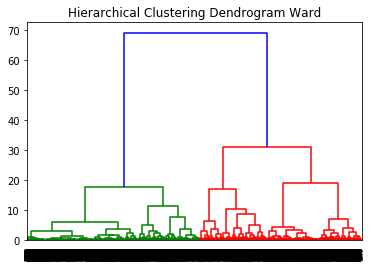

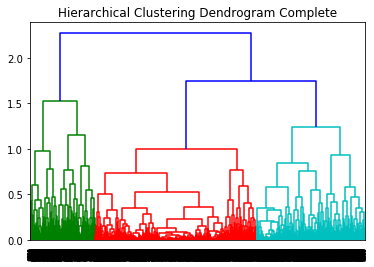

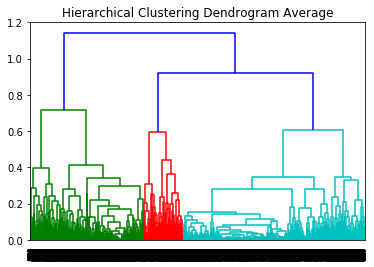

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)#scaled_df.reshape(1, -1))
pca_df = pca.fit_transform(scaled_df)

dend_ward = sch.dendrogram(sch.linkage(pca_df,method = 'ward'))
plt.title('Hierarchical Clustering Dendrogram Ward')
plt.show()

dend_Comp = sch.dendrogram(sch.linkage(pca_df,method = 'complete'))
plt.title('Hierarchical Clustering Dendrogram Complete')
plt.show()

dend_Acg = sch.dendrogram(sch.linkage(pca_df,method = 'average'))
plt.title('Hierarchical Clustering Dendrogram Average')
plt.show()

## 5. Visualization 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [100]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 

columns =  ['n_clusters','linkage','affinity','silhoutte_score','centroid']
agglo_pca = pd.DataFrame(data, columns=columns)
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()



clustering_ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward',affinity ='euclidean' ).fit(pca_df)
agglo_pca.loc[-1] = [2, 'ward', 'euclidean',metrics.silhouette_score(pca_df, clustering_ward.labels_),clf.fit(pca_df, clustering_ward.labels_).centroids_] 
agglo_pca.index = agglo_pca.index + 1 

clustering_comp_euc = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='euclidean').fit(pca_df)
agglo_pca.loc[-1] = [5, 'complete', 'euclidean',metrics.silhouette_score(pca_df, clustering_comp_euc.labels_),clf.fit(pca_df, clustering_comp_euc.labels_).centroids_]  
agglo_pca.index = agglo_pca.index + 1 

clustering_avg_euc = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='euclidean').fit(pca_df)
agglo_pca.loc[-1] = [2, 'average', 'euclidean',metrics.silhouette_score(pca_df, clustering_avg_euc.labels_),clf.fit(pca_df, clustering_avg_euc.labels_).centroids_]  
agglo_pca.index = agglo_pca.index + 1 

clustering_comp_man = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='manhattan').fit(pca_df)
agglo_pca.loc[-1] = [5, 'complete', 'manhattan',metrics.silhouette_score(pca_df, clustering_comp_man.labels_),clf.fit(pca_df, clustering_comp_man.labels_).centroids_] 
agglo_pca.index = agglo_pca.index + 1 

clustering_avg_man = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='manhattan').fit(pca_df)
agglo_pca.loc[-1] = [2, 'average', 'manhattan',metrics.silhouette_score(pca_df, clustering_avg_man.labels_),clf.fit(pca_df, clustering_avg_man.labels_).centroids_] 
agglo_pca.index = agglo_pca.index + 1 

clustering_comp_cos = AgglomerativeClustering(n_clusters = 5,linkage = 'complete',affinity ='cosine').fit(pca_df)
agglo_pca.loc[-1] = [5, 'complete', 'cosine',metrics.silhouette_score(pca_df, clustering_comp_cos.labels_),clf.fit(pca_df, clustering_comp_cos.labels_).centroids_]  
agglo_pca.index = agglo_pca.index + 1 

clustering_avg_cos = AgglomerativeClustering(n_clusters = 2,linkage = 'average',affinity ='cosine').fit(pca_df)
agglo_pca.loc[-1] = [2, 'average', 'cosine',metrics.silhouette_score(pca_df, clustering_avg_cos.labels_),clf.fit(pca_df, clustering_avg_cos.labels_).centroids_]  
agglo_pca.index = agglo_pca.index + 1 

agglo_pca = agglo_pca.sort_index() 
print(agglo_pca.head(7))


columns =  ['eps','min_pts','metric','n_clusters','core_points','noise_clusters','noise_points','silhoutte_score']
dbscan_pca = pd.DataFrame(data, columns=columns)

label = DBSCAN(eps=0.1, min_samples=5,metric = 'euclidean').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.1,5,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(pca_df, labels)] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.1, min_samples=5,metric = 'manhattan').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.1,5,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),metrics.silhouette_score(pca_df, labels)] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.1, min_samples=5,metric = 'cosine').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.1,5,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'euclidean').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.5,3,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'manhattan').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.5,3,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.5, min_samples=3,metric = 'cosine').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.5,3,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'euclidean').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.8,5,'euclidean',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'manhattan').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.8,5,'manhattan',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

label = DBSCAN(eps=0.8, min_samples=5,metric = 'cosine').fit(pca_df).labels_
dbscan_pca.loc[-1] = [0.8,5,'cosine',len(set(label)),len(label)-list(label).count(-1),1 if -1 in label else 0,list(label).count(-1),''] 
dbscan_pca.index = dbscan_pca.index + 1

dbscan_pca = dbscan_pca.sort_index() 
print(dbscan_pca.head(9))



   n_clusters   linkage   affinity  silhoutte_score  \
0         2.0   average     cosine         0.517418   
1         5.0  complete     cosine         0.358242   
2         2.0   average  manhattan         0.551397   
3         5.0  complete  manhattan         0.501860   
4         2.0   average  euclidean         0.530740   
5         5.0  complete  euclidean         0.510816   
6         2.0      ward  euclidean         0.565353   

                                            centroid  
0  [[-0.3882223483845745, 0.10330583729258784], [...  
1  [[0.6513808348442114, -0.10968657752850822], [...  
2  [[0.5301688671851047, 0.03339754227590414], [-...  
3  [[0.8384087274735622, 0.21113454859176892], [0...  
4  [[-0.3448346484063591, 0.06322813825473683], [...  
5  [[0.27405564180338743, 0.5772844376044786], [0...  
6  [[0.5338515350406486, -0.01820680941373544], [...  
   eps  min_pts     metric  n_clusters  core_points  noise_clusters  \
0  0.8      5.0     cosine         1.0       895

[-0.48216389 -0.60857712  0.3045079  ...  0.36038898 -0.64609449
 -0.09459714]


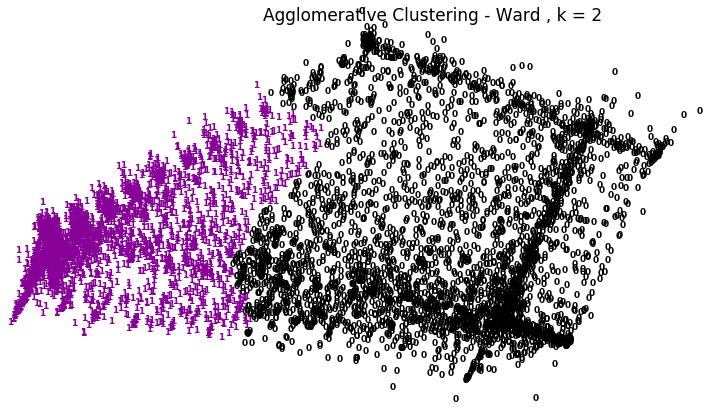

In [102]:
clustering_ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward',affinity ='euclidean' ).fit(pca_df)
labels = clustering_ward.labels_ 
print(pca_df[:,0])

#plt.figure(figsize=(6, 4))
for i in range(pca_df.shape[0]):
    plt.text(pca_df[i, 0], pca_df[i, 1], labels[i],
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.title('Agglomerative Clustering - Ward , k = 2', size=17)
plt.axis('off')
plt.show()

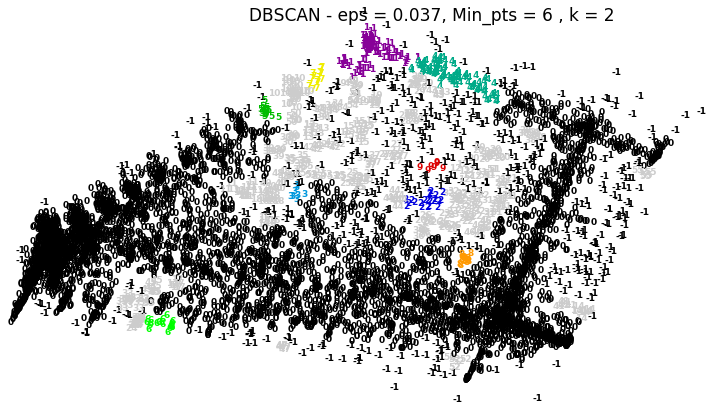

In [103]:
# suggested values of eps and min_points are not giving ang fruitful results
# tried multiple combinations of eps and min_points to get below.

label = DBSCAN(eps=0.037, min_samples=6,metric = 'manhattan').fit(pca_df).labels_

#plt.figure(figsize=(6, 4))
for i in range(pca_df.shape[0]):
    plt.text(pca_df[i, 0], pca_df[i, 1], label[i],
                 color=plt.cm.nipy_spectral(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.title('DBSCAN - eps = 0.037, Min_pts = 6 , k = 2', size=17)
plt.axis('off')
plt.show()